# Usage examples for `assignment` module

This module provides an implementation, and a few extensions, of the algorithm for the optimal stable one-to-one assignment described in by Irving et al. (1987). 

In [1]:
import numpy as np
from assignment import *

%store -r

## One-to-one assignment examples

### Example from Irving et al.

This is the example from Irving et al.'s original paper (1987, 535). It contains many rotations. For proof of concept, I provide the normal and reverse forms of the rotation graph; notice that they are each mirror images of the other. The optimal solutions will also complement each other if they are unique, but in this case there are multiple optimal solutions, so they appear different.

([[2, 0, 4, 6, 3], [0, 2, 3, 7, 6], [6, 3, 2, 0, 1, 7], [4, 7, 5, 0, 3, 6], [3, 1, 7, 6, 2, 5, 4], [5, 4, 6, 3, 2], [7, 5, 1, 2, 3, 4], [1, 6, 0, 2, 4]], [[3, 2, 7, 0, 1], [2, 6, 4, 7], [6, 4, 7, 2, 5, 1, 0], [5, 3, 1, 6, 2, 0, 4], [7, 6, 0, 4, 5, 3], [4, 3, 6, 5], [0, 3, 4, 5, 1, 7, 2], [1, 4, 3, 2, 6]])
([[3, 2, 7, 0, 1, 4, 6], [2, 6, 4, 7, 5, 3], [6, 4, 7, 2, 1, 0, 3], [5, 1, 2, 4, 7], [7, 0, 5, 3, 2], [4, 3, 6, 5, 1, 7, 2], [0, 4, 5, 7, 2, 6], [1, 4, 3, 6, 7, 5]], [[2, 0, 4, 6], [5, 0, 2, 3, 7], [6, 3, 2, 5, 4, 0, 1], [4, 2, 7, 1, 5, 0], [3, 0, 1, 7, 6, 2, 5], [5, 1, 4, 6, 7, 3], [6, 7, 0, 5, 1, 2], [1, 5, 6, 0, 7, 2, 3, 4]])
([[2, 0, 4, 6], [0, 2, 3, 7], [6, 3, 2, 5, 4, 0, 1], [4, 2, 7, 1, 5, 0], [3, 0, 1, 7, 6, 2, 5], [5, 1, 4, 6, 7, 3], [7, 0, 5, 1, 2], [1, 5, 6, 0, 7, 2, 3, 4]], [[3, 2, 7, 0, 1], [2, 6, 4, 7], [6, 4, 7, 2, 5, 1, 0], [5, 3, 1, 6, 2, 0, 4], [7, 6, 0, 4, 5, 3], [4, 3, 6, 5], [0, 3, 4, 5, 1, 7, 2], [1, 4, 3, 2, 6]])
({(0, 1), (2, 4), (1, 2), (3, 4), (5, 8), (4, 9),

Text(0.5, 1.0, 'Rotation flow graph (reverse Gale-Shapley)')

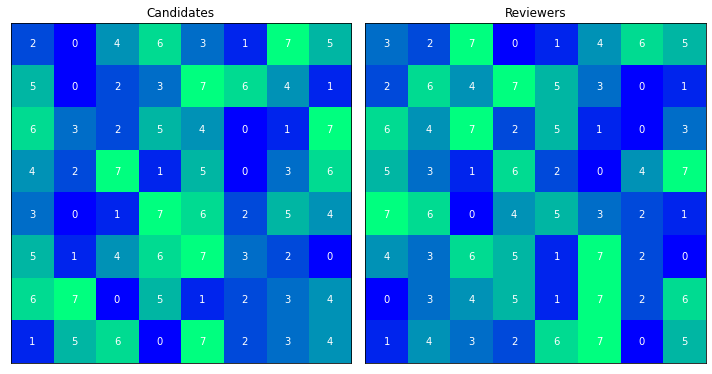

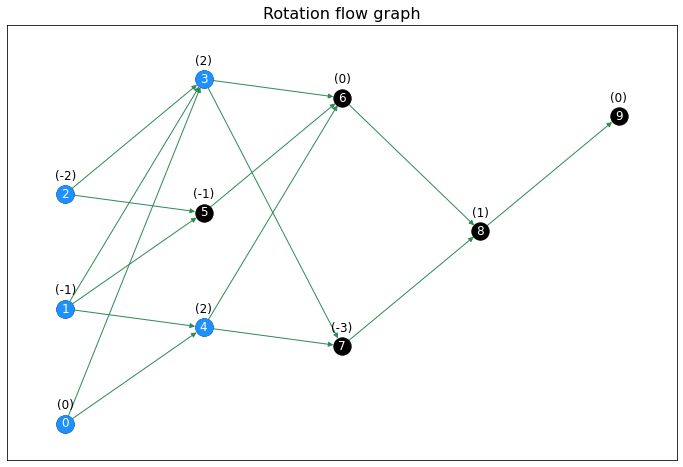

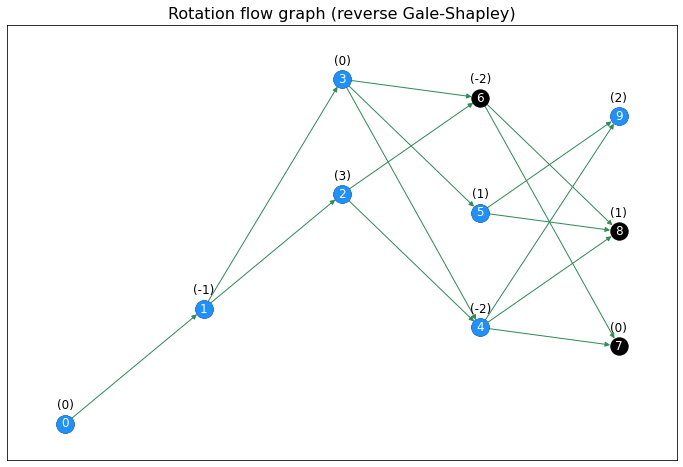

In [2]:
men = (np.array([3,1,5,7,4,2,8,6,
                 6,1,3,4,8,7,5,2,
                 7,4,3,6,5,1,2,8,
                 5,3,8,2,6,1,4,7,
                 4,1,2,8,7,3,6,5,
                 6,2,5,7,8,4,3,1,
                 7,8,1,6,2,3,4,5,
                 2,6,7,1,8,3,4,5]).reshape(8,8) - 1).tolist()
women = (np.array([4,3,8,1,2,5,7,6,
                   3,7,5,8,6,4,1,2,
                   7,5,8,3,6,2,1,4,
                   6,4,2,7,3,1,5,8,
                   8,7,1,5,6,4,3,2,
                   5,4,7,6,2,8,3,1,
                   1,4,5,6,2,8,3,7,
                   2,5,4,3,7,8,1,6]).reshape(8,8) - 1).tolist()
marriage_i = assignment(men, women)
print(marriage_i.osa())

viz_prefs(men, women, {'figsize': (9, 6)})

marriage_i.draw_rotation_digraph(kwargs={"figsize": (9, 6)})
plt.title("Rotation flow graph", size=16)

marriage_i.draw_rotation_digraph(reverse=True, kwargs={"figsize": (9, 6)})
plt.title("Rotation flow graph (reverse Gale-Shapley)", size=16)

### Randomly generated examples

Here are two randomly generated assignment problems that happen to contain multiple stable assignments.

<Figure size 864x576 with 0 Axes>

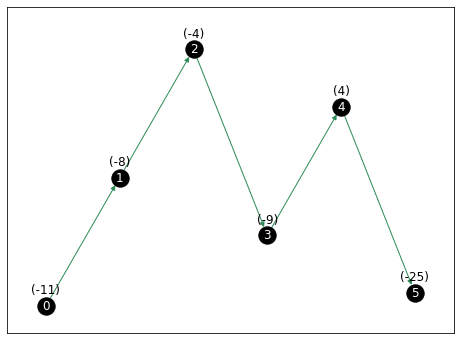

In [3]:
np.random.seed(29241)

m = 28
n = 30

A = [list(np.random.permutation(range(n)))[:np.random.randint(n-3, n)] for _ in range(m)]
B = [list(np.random.permutation(range(m)))[:np.random.randint(m-3, m)] for _ in range(n)] 

material = assignment(A, B)
plt.figure(figsize=(12,8))
material.draw_rotation_digraph(reverse=True, verbose=0, kwargs={'figsize': (8, 6)})

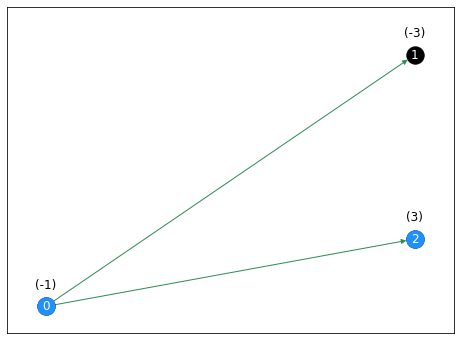

In [15]:
np.random.seed(69896)

m = 9
n = 9

A = [list(np.random.permutation(range(n)))[:np.random.randint(n-3, n)] for _ in range(m)]
B = [list(np.random.permutation(range(m)))[:np.random.randint(m-3, m)] for _ in range(n)] 

material = assignment(A, B)
material.draw_rotation_digraph(kwargs={'figsize': (8, 6)})

### Typical solution space of randomly generated problems

Asymmetrical problems, and problems with desk rejects, typically have few or no rotations.

In [5]:
%%script false --no-raise-error
%%time
np.random.seed(900)

size = 5000

n = 30
m = 35

n_rotations_1d = []

print("_" * 50)

for i in range(size):
    if (i + 1) % (size / 50) == 0: print("=", end="")

    A = [list(np.random.permutation(range(n)))[:np.random.randint(n/2, n)] for _ in range(m)]
    B = [list(np.random.permutation(range(m)))[:np.random.randint(m/2, m)] for _ in range(n)] 

    material = assignment(A, B)
    n_rotations_1d.append(len(material.rotate()[3]))
    
print()

n_rotations_1d = np.array(n_rotations_1d)
%store n_rotations_1d

Couldn't find program: 'false'


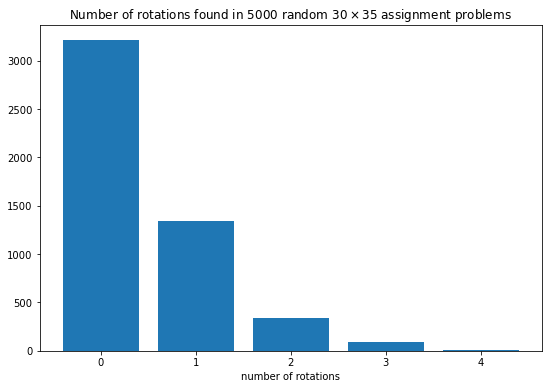

In [6]:
counts = [(n_rotations_1d==i).sum() for i in range(n_rotations_1d.max())]

plt.figure(figsize=(9, 6))
plt.xlabel("number of rotations")
plt.title(r"Number of rotations found in 5000 random $30 \times 35$ assignment problems")
plt.bar(range(len(counts)), counts)
pass

Symmetrical problems tend to have a larger solution set.

In [7]:
size = 20000
maxn = 100

In [8]:
%%script false --no-raise-error
%%time
np.random.seed(8585)

n_participants = []
n_remaining = []
n_rotations = []

print("_" * 50)

for i in range(size):
    if (i + 1) % (size / 50) == 0: print("=", end="")

    n_i = np.random.randint(3, maxn)

    A = [list(np.random.permutation(range(n_i))) for _ in range(n_i)]
    B = [list(np.random.permutation(range(n_i))) for _ in range(n_i)] 

    material = assignment(A, B)

    n_participants.append(n_i)
    n_remaining.append(sum([len(i) for i in material.GaleShapley()[1]]))
    n_rotations.append(len(material.rotate()[3]))

print()

n_participants = np.array(n_participants)
n_remaining = np.array(n_remaining)
n_rotations = np.array(n_rotations)

%store n_participants
%store n_remaining
%store n_rotations

Couldn't find program: 'false'


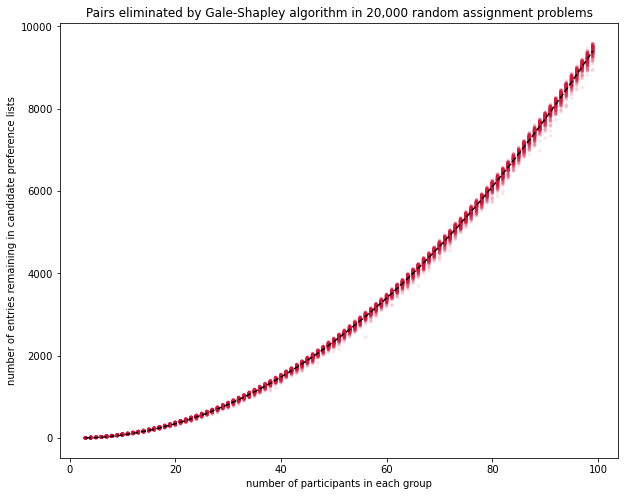

In [9]:
coef = np.linalg.lstsq(np.stack([n_participants, n_participants**2]).T,
                       n_remaining, rcond=None)[0]

fig, ax = plt.subplots(figsize=(10,8))
x_plot = np.arange(3, maxn)
ax.plot(x_plot, coef @ [x_plot, x_plot**2], color="black", ls="--")
ax.scatter(n_participants, n_remaining, marker=".", color="crimson", alpha = .1, s=50, ec=None)
ax.set_xlabel("number of participants in each group")
ax.set_ylabel("number of entries remaining in candidate preference lists")
ax.set_title("Pairs eliminated by Gale-Shapley algorithm in 20,000 random assignment problems")
pass

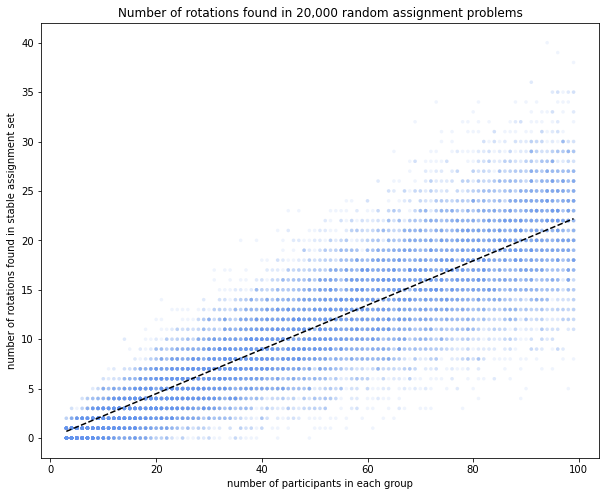

In [10]:
coef = np.linalg.lstsq(n_participants.reshape(-1,1),
                        n_rotations, rcond=None)[0]

fig, ax = plt.subplots(figsize=(10,8))
x_plot = np.arange(3, maxn)
ax.plot(x_plot, coef * x_plot, color="black", ls="--")
ax.scatter(n_participants, n_rotations, marker=".", color="cornflowerblue", alpha = .1, s=50, ec=None)
ax.set_xlabel("number of participants in each group")
ax.set_ylabel("number of rotations found in stable assignment set")
ax.set_title("Number of rotations found in 20,000 random assignment problems")
pass

## Behavior when no rotations are present

In [11]:
# Men propose to women (one-to-one)
# Contains only one stable matching
men = [[0, 1, 2],
       [0, 1, 3],
       [1, 0, ],
       [0, 1],
       [1, 0, 3]]
women = [[0, 1, 2, 4, 3],
         [0, 1, 4,],
         [0, 2, 1, 3],
         [1, 0, 4]]

proposal = assignment(men, women)
print(proposal.GaleShapley())
print(proposal.GaleShapley(reverse=True))

([(0, 0), (1, 1), (4, 3)], [[0, 1, 2], [1, 3], [], [], [3]])
([(0, 0), (1, 1), (3, 4)], [[0, 1, 2, 4, 3], [1, 4], [], [4]])


In [12]:
applicants = [[11, 12, 10, 8, 9, 7, 6, 5, 4, 3, 2, 1, 0],
              [11, 10, 12, 9, 6, 8, 7, 5, 1, 4, 3, 2, 0],
              [12, 10, 9, 11, 8, 7, 6, 5, 4, 1, 0, 3, 2],
              [11, 12, 9, 10, 8, 6, 7, 5, 2, 4, 3, 1, 0],
              [11, 12, 10, 9, 7, 6, 8, 5, 4, 2, 1, 3, 0],
              [9, 11, 12, 10, 8, 7, 6, 5, 4, 3, 2, 1, 0],
              [12, 9, 10, 11, 7, 8, 6, 5, 2, 1, 0, 4, 3],
              [12, 11, 9, 10, 8, 7, 6, 5, 1, 4, 3, 2, 0],
              [12, 11, 10, 9, 7, 8, 6, 5, 3, 2, 4, 1, 0]]

firms = [[0,2,8,3,4,7,1,6,5],
         [2,0,8,4,7,3,6,1,5],
         [0,8,2,4,1,3,7,5,6],
         [2,3,0,7,8,4,5,6,1],
         [0,2,3,8,4,1,7,5],
         [0,2,8,4,3,1,5],
         [2,0,3,8,1],
         [0,2,1,4],
         [0,2,4],
         [0,2],
         [2,4],
         [0,2],
         [2,0]]

hiring = assignment(applicants, firms)

# No output expected
hiring.draw_rotation_digraph()

No rotations present


## Multiple assignment examples

We can use the Gale-Shapley algorithm to find stable matchings in many-to-one and one-to-many assignment problems, too. However, the Irving et al. algorithm for rotation through stable matchings cannot be used in this case, as eliminating the rotations may violate the stability conditions (Baïou and Balinski, 2000).



In [13]:
# Universities with fixed quotas propose to applicants (one-to-many)
applicants = [[0,1,4,3],[1,4,3,0,2,],[1,4,3],[0,1,3],[0,2,1,3,4],[0,1,3]]
universities = [[0,1,2,3],
                [0,2,1],
                [0,1,2,3,4,5],
                [1,0,3,2,4,5],
                [0,1,2,3]]

university_capacities = [2, 2, 4, 4, 3]

admissions = assignment(applicants, universities, reviewer_capacity=university_capacities)
print(admissions.GaleShapley(reverse=True))

# Applicants propose to universities with fixed quotas (many-to-one)
print(admissions.GaleShapley())

([(0, 0), (0, 3), (1, 2), (1, 1), (2, 4), (3, 5)], [[0, 3], [2, 1], [4], [5], []])
([(0, 0), (1, 1), (2, 1), (3, 0), (4, 2), (5, 3)], [[0, 1, 4, 3], [1, 4, 3, 0, 2], [1, 4, 3], [0, 1, 3], [2, 1, 3, 4], [3]])


In [16]:
!jupyter nbconvert --to html assignment_exs.ipynb

[NbConvertApp] Converting notebook assignment_exs.ipynb to html
[NbConvertApp] Writing 1004562 bytes to assignment_exs.html
